In [37]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from datetime import timedelta
from prophet import Prophet
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import random

In [2]:

# List of sectors and their respective ticker symbols
sectors = {
    'Energy': '^AXEJ',
    'Materials': '^AXMJ',
    'Industrials': '^AXNJ',
    'Consumer Discretionary': '^AXDJ',
    'Consumer Staples': '^AXSJ',
    'Health Care': '^AXHJ',
    'Financials': '^AXFJ',
    'Information Technology': '^AXIJ',
    'Communication Services': '^AXTJ',
    'Utilities': '^AXUJ',
    'Real Estate': '^AXPJ'
}

# Define the date range
end_date = "2023-06-30"  # Today's date
start_date = (datetime.strptime(end_date, '%Y-%m-%d') - pd.DateOffset(years=5)).strftime('%Y-%m-%d')  # Date 5 years before the end_date

# Download data for all tickers over the specified date range
data = yf.download(list(sectors.values()), start=start_date, end=end_date)


# Extract the 'Close' data for all tickers
close_data = data['Close']


# Display the closing prices
print(close_data)



[*********************100%***********************]  11 of 11 completed
                  ^AXDJ         ^AXEJ        ^AXFJ         ^AXHJ        ^AXIJ  \
Date                                                                            
2018-07-02  2440.000000  11941.000000  6197.000000  30366.800781  1129.300049   
2018-07-03  2463.500000  12052.200195  6253.700195  30708.099609  1133.400024   
2018-07-04  2459.800049  12006.900391  6207.500000  30593.099609  1126.900024   
2018-07-05  2459.199951  12048.400391  6269.700195  30726.400391  1122.900024   
2018-07-06  2470.500000  12201.299805  6343.700195  30853.900391  1123.500000   
...                 ...           ...          ...           ...          ...   
2023-06-23  2863.100098  10614.900391  6085.200195  41490.500000  1750.300049   
2023-06-26  2860.399902  10605.000000  6055.000000  41250.398438  1765.699951   
2023-06-27  2861.000000  10627.500000  6094.700195  41200.898438  1759.199951   
2023-06-28  2922.199951  10754.700195 

<Axes: xlabel='Date'>

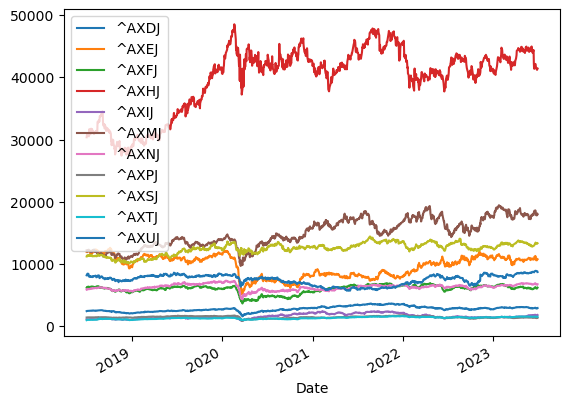

In [5]:
close_data.plot()

In [6]:
## Normalise the data

daily_returns = close_data.pct_change()


In [7]:
daily_returns.head()

,^AXDJ,^AXEJ,^AXFJ,^AXHJ,^AXIJ,^AXMJ,^AXNJ,^AXPJ,^AXSJ,^AXTJ,^AXUJ
Date,,,,,,,,,,,
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-03,0.009631,0.009312,0.009150,0.011239,0.003631,-0.014306,0.011168,0.005156,0.011483,0.021410,0.012834
2018-07-04,-0.001502,-0.003759,-0.007388,-0.003745,-0.005735,-0.001530,-0.006721,-0.001546,-0.005359,0.005365,0.002025
2018-07-05,-0.000244,0.003456,0.010020,0.004357,-0.003550,-0.002281,0.008841,0.002041,0.004271,0.016996,0.015233
2018-07-06,0.004595,0.012690,0.011803,0.004150,0.000534,0.011240,0.004934,0.006602,0.006794,0.013991,0.002939


In [8]:
## Clean data

print(daily_returns.isna().sum())

^AXDJ    1
^AXEJ    1
^AXFJ    1
^AXHJ    1
^AXIJ    1
^AXMJ    1
^AXNJ    1
^AXPJ    1
^AXSJ    1
^AXTJ    1
^AXUJ    1
dtype: int64


In [9]:
## Drop the NA's
daily_returns_dropped = daily_returns.dropna()

<Axes: xlabel='Date'>

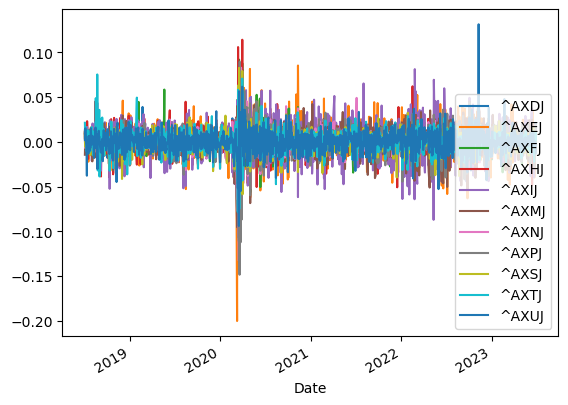

In [10]:
daily_returns_dropped.plot()

In [11]:
summary_stats = daily_returns_dropped.describe()
summary_stats

,^AXDJ,^AXEJ,^AXFJ,^AXHJ,^AXIJ,^AXMJ,^AXNJ,^AXPJ,^AXSJ,^AXTJ,^AXUJ
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,0.000237,0.000107,0.000101,0.000350,0.000575,0.000419,0.000180,0.000086,0.000196,0.000424,0.000127
std,0.013394,0.019219,0.014027,0.014462,0.019961,0.014953,0.011947,0.015255,0.010813,0.012113,0.012482
min,-0.102377,-0.200077,-0.111005,-0.099524,-0.104969,-0.095127,-0.132673,-0.148343,-0.058461,-0.078502,-0.093931
25%,-0.006260,-0.009728,-0.005701,-0.007092,-0.009792,-0.008249,-0.005561,-0.006966,-0.005291,-0.005648,-0.006507
50%,0.000772,0.000647,0.000392,0.000629,0.001047,0.000778,0.000633,0.000298,0.000909,0.000991,0.000205
75%,0.007438,0.010226,0.006777,0.007845,0.012252,0.009555,0.006456,0.007638,0.006055,0.006990,0.006897
max,0.081110,0.085410,0.091981,0.114232,0.081364,0.090136,0.082963,0.089406,0.082754,0.075434,0.131498


In [12]:
### Analysing Impact on Stock Indeces after Shock
## Cumulative drop after 1 month

def cumulative_drop_after_event(event_date, days_after=30):
    after_event_data = daily_returns_dropped.loc[event_date:].head(days_after)
    return (after_event_data + 1).cumprod() - 1

covid_drop_1month = cumulative_drop_after_event('2020-03-11')
ukraine_drop_1month = cumulative_drop_after_event('2022-02-24')





<Axes: xlabel='Date'>

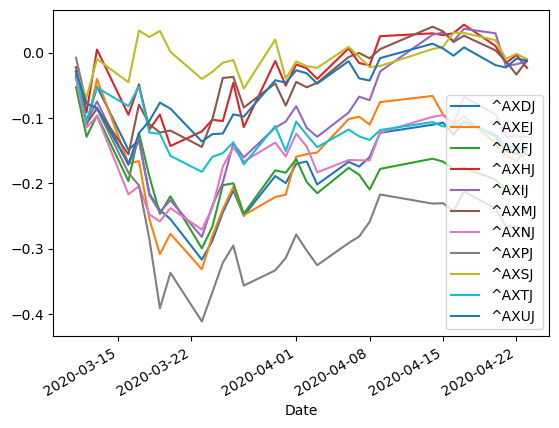

In [13]:
covid_drop_1month.plot()

<Axes: xlabel='Date'>

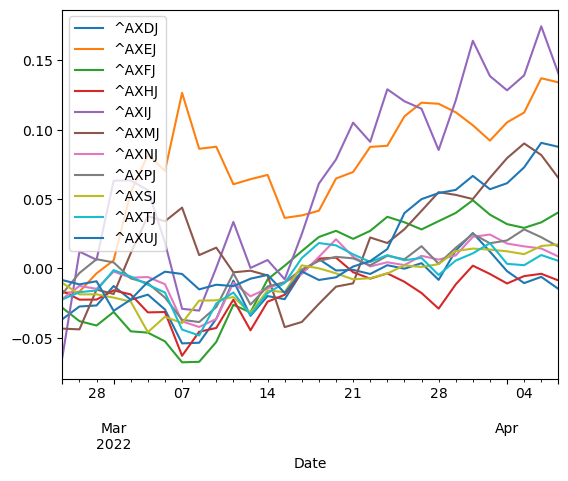

In [14]:
ukraine_drop_1month.plot()

<Figure size 1000x600 with 0 Axes>

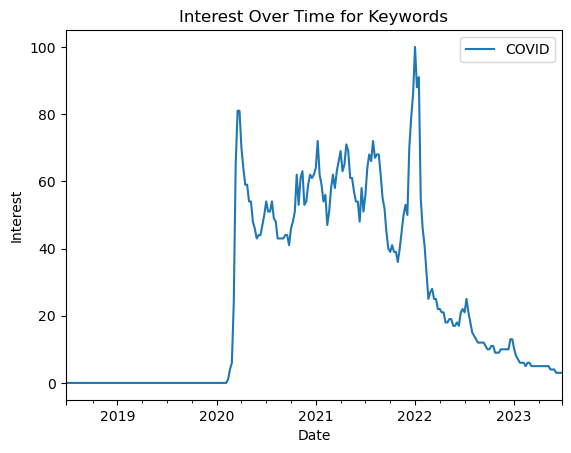

In [15]:


# Set up pytrends
pytrends = TrendReq(hl="en-US", tz=360)

# Keywords to track
keywords = ["COVID"]

# Build the payload
pytrends.build_payload(keywords, timeframe="2018-07-01 2023-06-30", geo="")

# Get interest over time data
interest_over_time_df = pytrends.interest_over_time()

# Plot the data
plt.figure(figsize=(10, 6))
interest_over_time_df.plot()
plt.title("Interest Over Time for Keywords")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.show()

In [16]:

prophet_df = daily_returns_dropped.copy()
prophet_df.head()

,^AXDJ,^AXEJ,^AXFJ,^AXHJ,^AXIJ,^AXMJ,^AXNJ,^AXPJ,^AXSJ,^AXTJ,^AXUJ
Date,,,,,,,,,,,
2018-07-03,0.009631,0.009312,0.009150,0.011239,0.003631,-0.014306,0.011168,0.005156,0.011483,0.021410,0.012834
2018-07-04,-0.001502,-0.003759,-0.007388,-0.003745,-0.005735,-0.001530,-0.006721,-0.001546,-0.005359,0.005365,0.002025
2018-07-05,-0.000244,0.003456,0.010020,0.004357,-0.003550,-0.002281,0.008841,0.002041,0.004271,0.016996,0.015233
2018-07-06,0.004595,0.012690,0.011803,0.004150,0.000534,0.011240,0.004934,0.006602,0.006794,0.013991,0.002939
2018-07-09,0.001700,-0.000320,0.002932,-0.004369,-0.000534,0.010983,-0.004494,-0.001326,0.000263,0.002396,-0.004573


In [17]:
prophet_df.index.name = 'ds'


In [18]:
#prophet_df.rename(columns={'Date': 'ds'}, inplace=True)
prophet_df.head()

,^AXDJ,^AXEJ,^AXFJ,^AXHJ,^AXIJ,^AXMJ,^AXNJ,^AXPJ,^AXSJ,^AXTJ,^AXUJ
ds,,,,,,,,,,,
2018-07-03,0.009631,0.009312,0.009150,0.011239,0.003631,-0.014306,0.011168,0.005156,0.011483,0.021410,0.012834
2018-07-04,-0.001502,-0.003759,-0.007388,-0.003745,-0.005735,-0.001530,-0.006721,-0.001546,-0.005359,0.005365,0.002025
2018-07-05,-0.000244,0.003456,0.010020,0.004357,-0.003550,-0.002281,0.008841,0.002041,0.004271,0.016996,0.015233
2018-07-06,0.004595,0.012690,0.011803,0.004150,0.000534,0.011240,0.004934,0.006602,0.006794,0.013991,0.002939
2018-07-09,0.001700,-0.000320,0.002932,-0.004369,-0.000534,0.010983,-0.004494,-0.001326,0.000263,0.002396,-0.004573


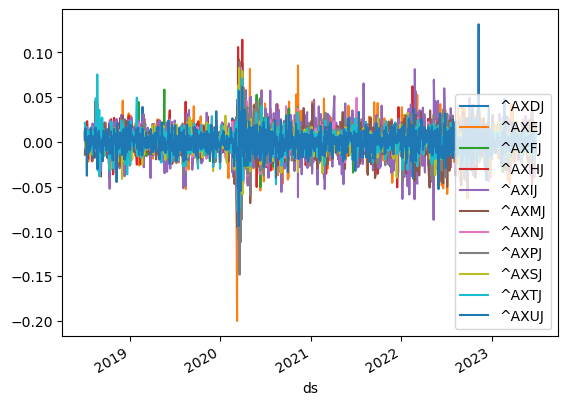

In [19]:
#prophet_df.index.name = 'ds'

prophet_df.plot();



In [20]:
prophet_axpj_df = prophet_df.iloc[:,[7]].copy()
print(prophet_axpj_df)

               ^AXPJ
ds                  
2018-07-03  0.005156
2018-07-04 -0.001546
2018-07-05  0.002041
2018-07-06  0.006602
2018-07-09 -0.001326
...              ...
2023-06-23 -0.028054
2023-06-26  0.000379
2023-06-27  0.019538
2023-06-28  0.019758
2023-06-29 -0.009833

[1264 rows x 1 columns]


In [21]:
prophet_axpj_df = prophet_df.iloc[:, [7]].copy()
prophet_axpj_df.columns = ['y']
print(prophet_axpj_df)


                   y
ds                  
2018-07-03  0.005156
2018-07-04 -0.001546
2018-07-05  0.002041
2018-07-06  0.006602
2018-07-09 -0.001326
...              ...
2023-06-23 -0.028054
2023-06-26  0.000379
2023-06-27  0.019538
2023-06-28  0.019758
2023-06-29 -0.009833

[1264 rows x 1 columns]


In [22]:
prophet_axpj_df = prophet_axpj_df.reset_index()

In [23]:
prophet_axpj_df.head()

,ds,y
0,2018-07-03,0.005156
1,2018-07-04,-0.001546
2,2018-07-05,0.002041
3,2018-07-06,0.006602
4,2018-07-09,-0.001326


In [24]:
#Incorporate Shocks

events = pd.DataFrame({
    'holiday': 'event_name',
    'ds':pd.to_datetime(['2020-03-11', '2022-02-24']),   #Dates of shocks
    'lower_window': 0,
    'upper_window': 1,
})

    
    

In [25]:
#Build and train the miodel
#Initialise and fit the data

model = Prophet(holidays=events)
model.fit(prophet_axpj_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.34827


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2259.87   8.09278e-06       78.8284      0.2896           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       2259.88   1.45016e-07       84.0265           1           1      175   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [26]:
## Forecasting
future = model.make_future_dataframe(periods=365)  # for a year into the future
forecast = model.predict(future)



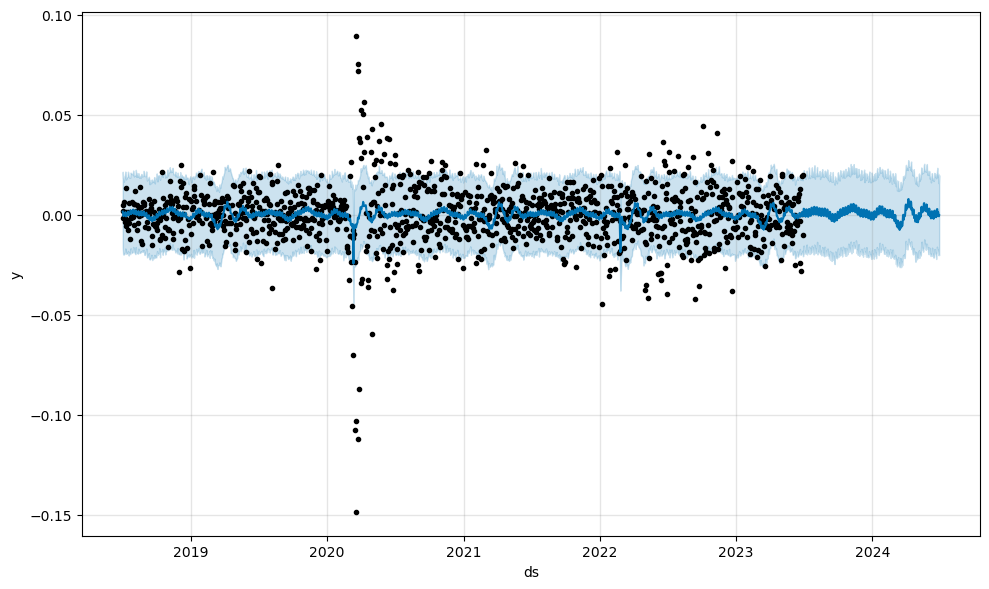

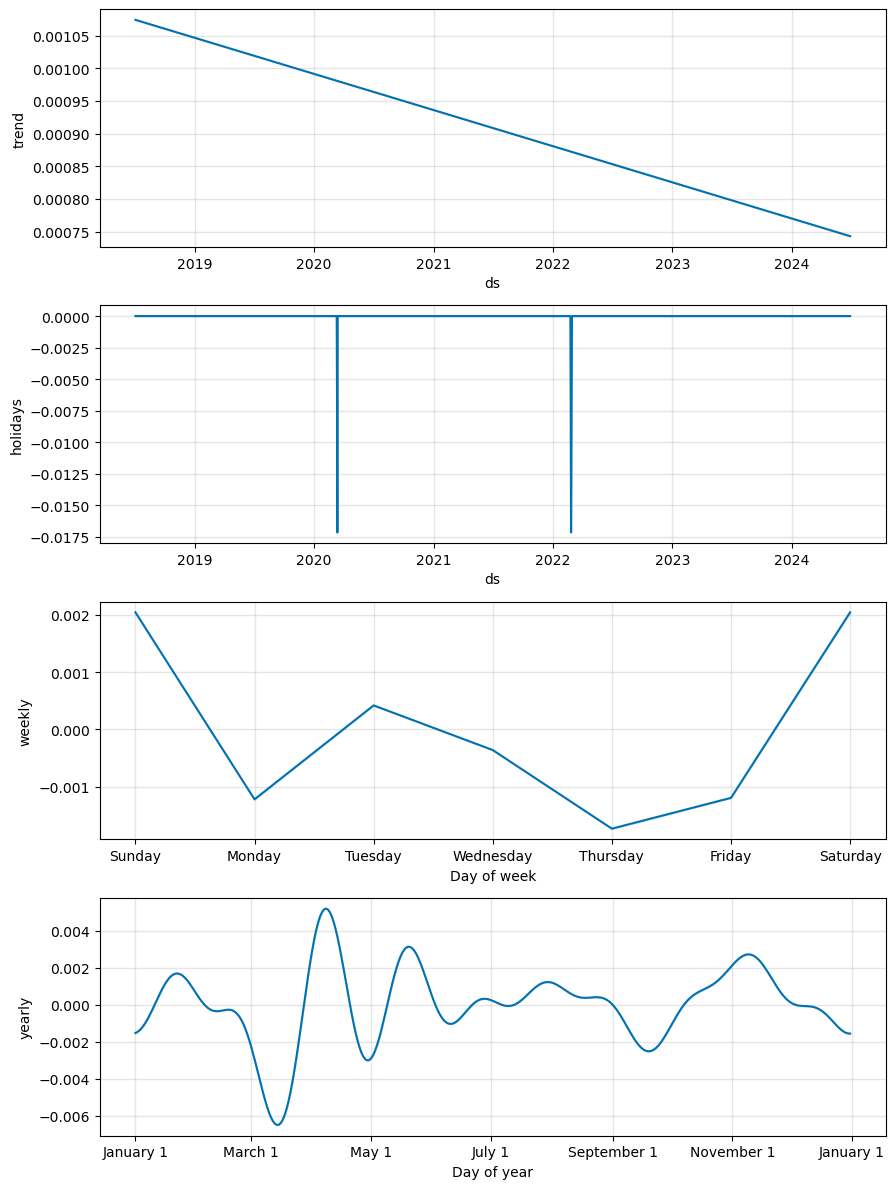

In [27]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [32]:
## What if the shock was defined as four weeks.

events_4_weeks = pd.DataFrame({
  'holiday': 'event_name',
  'ds': pd.to_datetime(['2020-03-11', '2022-02-24']),  # Dates of the events
  'lower_window': 0,
  'upper_window': 27,  # 4 weeks = 28 days, but since the day of the shock is included, we set the upper window to 27.
})


In [33]:
model_4_weeks = Prophet(holidays=events_4_weeks)
model_4_weeks.fit(prophet_axpj_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.34827
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2411.6   0.000910227       117.054      0.5707      0.5707      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2412.1   2.75697e-05       85.5674      0.9801      0.9801      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2412.2   9.25046e-06       71.1251      0.4888      0.4888      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324        2412.2   3.45727e-08       88.2889      0.1509      0.6151      390   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [34]:
## Let's project forward 10 years
future_4_weeks = model_4_weeks.make_future_dataframe(periods=10)
forecast_4_weeks = model_4_weeks.predict(future_4_weeks)



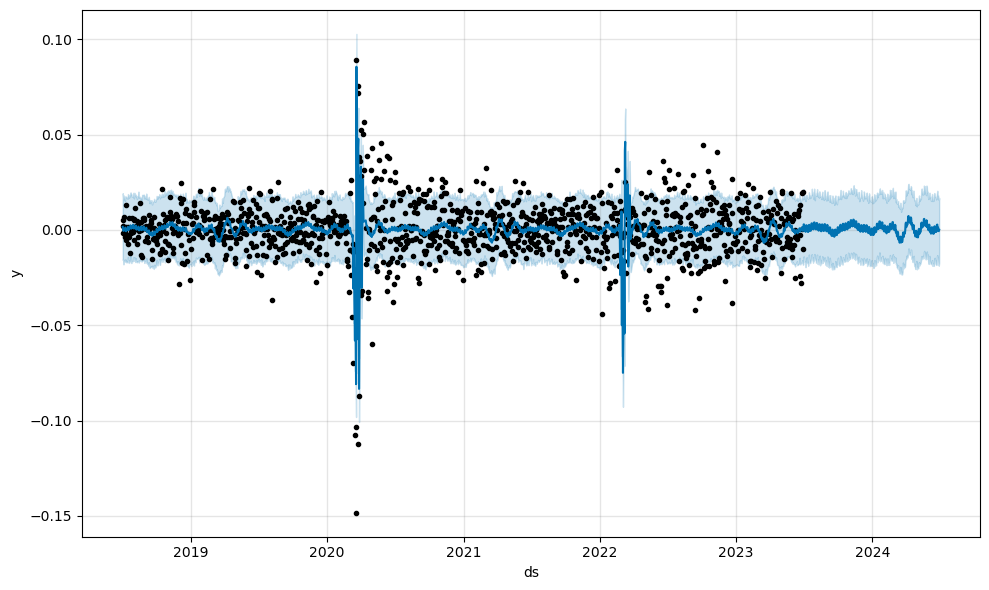

In [35]:
fig1_4_weeks = model_4_weeks.plot(forecast_4_weeks)


In [77]:
### 10 YEARS AND MORE SHOCKS@!!!!!!

## Let's predict forward 10 years
## Let's assume that a shock occurs about every 3 years

#Define a function to generate random intervals for shocks
def generate_random_interval(avg_years):
    # Convert average years to days and create a window of +/- 1 year
    lower_bound = (avg_years - 1) * 365.25
    upper_bound = (avg_years + 1) * 365.25
    return random.randint(int(lower_bound), int(upper_bound))

#Set parameters for the forecast
forecast_years = 10  # For example, 35 years
avg_years_between_shocks = 5
start_date = pd.to_datetime("2018-07-02")  # Start date of your data or any relevant start date

# Calculate the number of shocks based on average years between shocks
num_shocks = int(forecast_years / avg_years_between_shocks)

#Generate Random Shocks
shocks_df = pd.DataFrame({
    'holiday': 'shock_event',
    'ds': [start_date + timedelta(days=generate_random_interval(avg_years_between_shocks)) for _ in range(num_shocks)],
    'lower_window': 0,  # Immediate effect
    'upper_window': 15,  # Effect lasts for xx days
})



In [78]:
##Build the model and fit the data

model = Prophet(holidays=shocks_df)
model.fit(prophet_axpj_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.34827


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2259.11   0.000152493       81.0508       0.595       0.595      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       2259.13   6.63875e-08       97.2646      0.5434           1      191   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [79]:
## Create a model for future predictions (10 Years)

future = model.make_future_dataframe(periods=forecast_years * 365)  # Create future dataframe
forecast = model.predict(future)



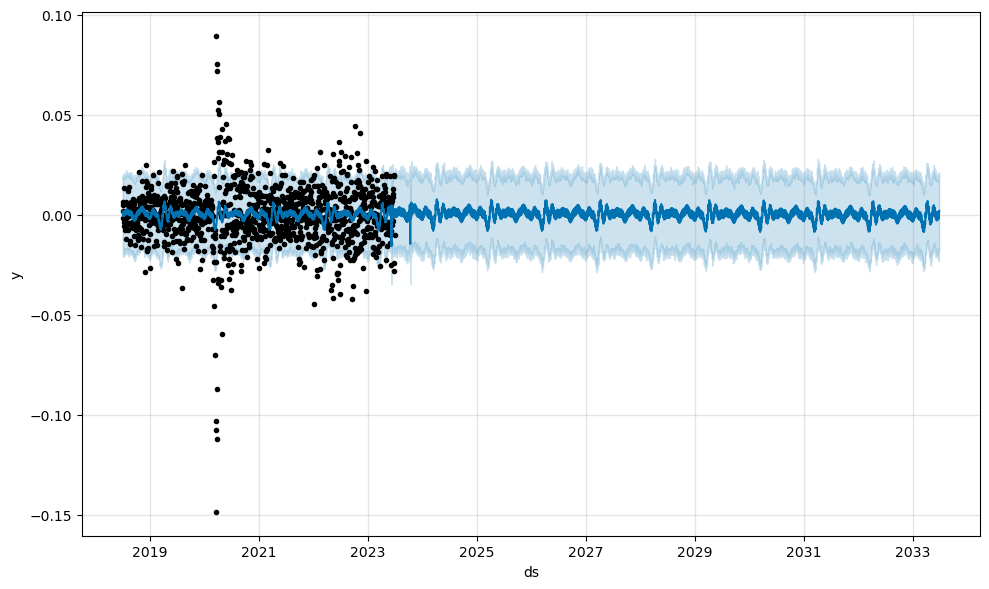

In [80]:
fig = model.plot(forecast)
